# Eliran Refaeli & Guy Dinar

# Kaggle Dataset

https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
import warnings
pd.options.mode.chained_assignment = None

# Getting Started...

## Importing Dataset

In [2]:
# get links from github
audi_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/audi.csv'
bmw_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/bmw.csv'
focus_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/focus.csv'
ford_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/ford.csv'
hyundi_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/hyundi.csv'
merc_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/merc.csv'
skoda_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/skoda.csv'
toyota_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/toyota.csv'
vw_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/vw.csv'

# import csv as dataframe
audi = pd.read_csv(audi_dataset)
bmw = pd.read_csv(bmw_dataset)
ford = pd.read_csv(ford_dataset)
hyundi = pd.read_csv(hyundi_dataset)
merc = pd.read_csv(merc_dataset)
skoda = pd.read_csv(skoda_dataset)
toyota = pd.read_csv(toyota_dataset)
vw = pd.read_csv(vw_dataset)

# add manufacturer column
audi['manufacturer'] = 'Audi'
bmw['manufacturer'] = 'BMW'
ford['manufacturer'] = 'Ford'
hyundi['manufacturer'] = 'Hyundi'
merc['manufacturer'] = 'Mercedes'
skoda['manufacturer'] = 'Skoda'
toyota['manufacturer'] = 'Toyota'
vw['manufacturer'] = 'VW'

hyundi.rename(columns = {'tax(£)': 'tax'}, inplace = True)

# append (union) all files
df = audi.append([bmw, ford, hyundi, merc, skoda, toyota, vw])

In [3]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,VW
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,VW
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,VW
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,VW


## Data Cleaning

We used this dataset in our EDA project. We explored the data and made some decisions when cleaning it. We are continuing from that point, with minor comments explaining what we're doing.

In [4]:
# Change Mileage and MPG to Metric
df['kilometers'] = df.mileage * 1.6
df['kpl'] = round(df.mpg / 2.352, 1)

# Taking 20 years worth of data
df1 = df[(df['year'] >= 2000) & (df['year'] <= 2020)]

# Removing Engine size 0
df2 = df1[df1.engineSize != 0]

# Removing brand new cars
three_stds = df2.kpl.std() * 3
kpl_mean = df2.kpl.mean()
kpl_min = kpl_mean - three_stds
kpl_max = kpl_mean + three_stds
df3 = df2[df2.kpl.between(kpl_min, kpl_max)].copy()
df3[df3.kilometers >= 400000]

# Drop unused columns
df3.drop(columns=['mpg', 'mileage'], inplace=True)

cars_df = df3.copy()

In [5]:
# Trimming strings
cars_df['model'] = cars_df['model'].str.strip()
cars_df['transmission'] = cars_df['transmission'].str.strip()
cars_df['fuelType'] = cars_df['fuelType'].str.strip()

In [6]:
cars_df.head()

,model,year,price,transmission,fuelType,tax,engineSize,manufacturer,kilometers,kpl
0,A1,2017,12500,Manual,Petrol,150,1.4,Audi,25176.0,23.6
1,A6,2016,16500,Automatic,Diesel,20,2.0,Audi,57924.8,27.3
2,A1,2016,11000,Manual,Petrol,30,1.4,Audi,47913.6,23.6
3,A4,2017,16800,Automatic,Diesel,145,2.0,Audi,41523.2,28.6
4,A3,2019,17300,Manual,Petrol,145,1.0,Audi,3196.8,21.1


## General Information

In [7]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84727 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         84727 non-null  object 
 1   year          84727 non-null  int64  
 2   price         84727 non-null  int64  
 3   transmission  84727 non-null  object 
 4   fuelType      84727 non-null  object 
 5   tax           84727 non-null  int64  
 6   engineSize    84727 non-null  float64
 7   manufacturer  84727 non-null  object 
 8   kilometers    84727 non-null  float64
 9   kpl           84727 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 7.1+ MB


In [8]:
cars_df.describe(include='all')

,model,year,price,transmission,fuelType,tax,engineSize,manufacturer,kilometers,kpl
count,84727,84727.000000,84727.000000,84727,84727,84727.000000,84727.000000,84727,84727.000000,84727.000000
unique,169,NaN,NaN,4,5,NaN,NaN,8,NaN,NaN
top,Fiesta,NaN,NaN,Manual,Petrol,NaN,NaN,Ford,NaN,NaN
freq,6536,NaN,NaN,44321,43964,NaN,NaN,17906,NaN,NaN
mean,NaN,2017.109693,17778.205483,NaN,NaN,119.204150,1.706424,NaN,36734.685548,23.365944
std,NaN,2.099283,10130.888240,NaN,NaN,64.221903,0.579255,NaN,34050.682276,4.875070
min,NaN,2000.000000,495.000000,NaN,NaN,0.000000,1.000000,NaN,1.600000,7.600000
25%,NaN,2016.000000,10750.000000,NaN,NaN,125.000000,1.200000,NaN,11276.000000,20.000000
50%,NaN,2017.000000,15660.000000,NaN,NaN,145.000000,1.600000,NaN,27520.000000,23.600000
75%,NaN,2019.000000,21995.000000,NaN,NaN,145.000000,2.000000,NaN,51680.000000,26.700000


# Preprocessing

## Feature Correlation

In [9]:
cars_df.corr()

,year,price,tax,engineSize,kilometers,kpl
year,1.000000,0.510666,0.214497,-0.033667,-0.752503,-0.210584
price,0.510666,1.000000,0.345270,0.648130,-0.432411,-0.538959
tax,0.214497,0.345270,1.000000,0.314237,-0.220917,-0.589041
engineSize,-0.033667,0.648130,0.314237,1.000000,0.104227,-0.381198
kilometers,-0.752503,-0.432411,-0.220917,0.104227,1.000000,0.252444
kpl,-0.210584,-0.538959,-0.589041,-0.381198,0.252444,1.000000


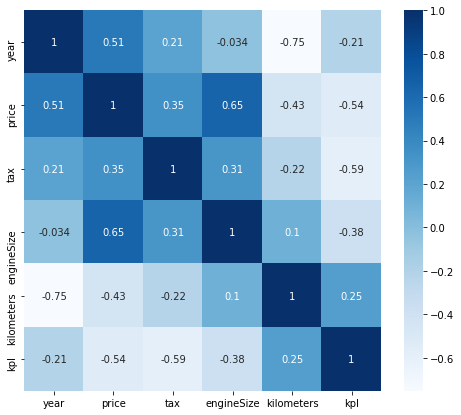

In [10]:
# Checking correlation between metrics
plt.figure(figsize=(8, 7))
sns.heatmap(data=cars_df.corr(), cmap='Blues', annot=True);

## Feature Engineering

There are 4 string columns.


1.   We decided to remove "Manufacturer" as the manufacturer itself does not hint at a price.
2.   We decided to reduce values in "Fuel Type" and "Transmission" because about half the population has one value in a given dimension.

In [11]:
# Removing "Manufacturer"
cars_df.drop(labels=['manufacturer'], axis=1, inplace=True)

In [12]:
# Reducing values in "Fuel Type"
print('These are the values in the "Fuel Type" column: ')
print(cars_df.fuelType.unique())
fuel_dict = {'Petrol': 1, 'Diesel': 0, 'Hybrid': 0, 'Other': 0, 'Electric': 0}
cars_df.fuelType = cars_df.fuelType.replace(fuel_dict)

# Reducing values in "Transmission"
print('These are the values in the "Transmission" column: ')
print(cars_df.transmission.unique())
transmission_dict = {'Manual': 1, 'Automatic': 0, 'Semi-Auto': 0, 'Other': 0}
cars_df.transmission = cars_df.transmission.replace(transmission_dict)

These are the values in the "Fuel Type" column: 
['Petrol' 'Diesel' 'Other' 'Hybrid' 'Electric']
These are the values in the "Transmission" column: 
['Manual' 'Automatic' 'Semi-Auto' 'Other']


In [13]:
cars_df

,model,year,price,transmission,fuelType,tax,engineSize,kilometers,kpl
0,A1,2017,12500,1,1,150,1.4,25176.0,23.6
1,A6,2016,16500,0,0,20,2.0,57924.8,27.3
2,A1,2016,11000,1,1,30,1.4,47913.6,23.6
3,A4,2017,16800,0,0,145,2.0,41523.2,28.6
4,A3,2019,17300,1,1,145,1.0,3196.8,21.1
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,1,0,125,2.0,118400.0,25.0
15153,Fox,2008,1799,1,1,145,1.2,140963.2,19.7
15154,Fox,2009,1590,1,1,200,1.4,112000.0,17.9
15155,Fox,2006,1250,1,1,150,1.2,132326.4,19.7


## Export the final dataframe

In [14]:
cars_df.to_csv('cars_df.csv')

# Using the models

## Linear Regression

### First run

In [15]:
# Creating Datasets
X = cars_df.drop(columns=['price', 'model'])
y = cars_df.price

seed = 12345
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Working with the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
score = model.score(X_test, y_test)

# RMSE for test population
rmse_test = mse(y_test, y_pred_test) ** 0.5

# RMSE for train population
y_pred_train = model.predict(X_train)
rmse_train = mse(y_train, y_pred_train) ** 0.5

# Validation (low score is better)
Validation = round(abs(rmse_train / rmse_test) -1, 3)

# # Initiate DF to keep track of models
result = pd.DataFrame(columns = ['Model', 'Score', 'RMSE_train', 'RMSE_test', 'Validation'])
result = result.append({'Model': 'Linear Regression - First Run', 'Score': score, 'RMSE_train': rmse_train, 'RMSE_test': rmse_test, 'Validation': Validation}, ignore_index=True)

result

,Model,Score,RMSE_train,RMSE_test,Validation
0,Linear Regression - First Run,0.77345,4806.726858,4767.268851,0.008


### Second run
We have created a traget encoding feature as a way to replace the categorical model column.

We created this feature from the training dataset and assigned it to the test dataset.
The next step was to fill the Null prices in the test dataset with the mean price overall.

In [16]:
# Splitting the data
X = cars_df
y = cars_df.price
 
# Splitting the data
seed = 12345
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Creating Target Encoding                      
X_train['target_encoding_avg'] = X_train.groupby(['model', 'year'])['price'].transform('mean')

target_encoding_avg = X_train.groupby(['model', 'year']).agg({'price': 'mean'}).reset_index()
for m, y, p in zip(target_encoding_avg.model, target_encoding_avg.year, target_encoding_avg.price):
  X_test.loc[(X_test.model == m) & (X_test.year == y), 'price_encoding'] = p

# Replacing nulls with mean price
X_test.price_encoding.fillna(cars_df.price.mean(), inplace=True)

X_train.drop(labels=['model', 'price'], axis=1, inplace=True)
X_test.drop(labels=['model', 'price'], axis=1, inplace=True)

# Working with the model
model = LinearRegression() # No limiting parameters
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
score = model.score(X_test, y_test)

# RMSE for train population
y_pred_train = model.predict(X_train)
rmse_train = mse(y_train, y_pred_train) ** 0.5

# RMSE for test population
rmse_test = mse(y_test, y_pred_test) ** 0.5

# Validation (Close to 0 is better)
Validation = round(abs(rmse_train / rmse_test) -1, 3)

# Add model results to DF
result = result.append({'Model': 'Linear Regression - Price Target Encoding', 'Score': score, 'RMSE_train': rmse_train, 'RMSE_test': rmse_test, 'Validation': Validation}, ignore_index=True)

result

,Model,Score,RMSE_train,RMSE_test,Validation
0,Linear Regression - First Run,0.773450,4806.726858,4767.268851,0.008
1,Linear Regression - Price Target Encoding,0.883151,3102.334196,3423.730013,-0.094


Model looks to be validated, but the RMSE for both train and test is pretty high.

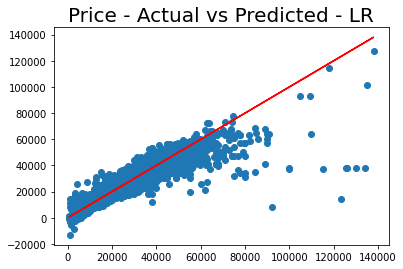

In [17]:
# Show individual distance from actual
plt.scatter(y_test, y_pred_test)
plt.plot(y_test, y_test, c='red')
plt.title('Price - Actual vs Predicted - LR', size=20)
plt.show()

In [18]:
# Show error on row level
LR_error = pd.DataFrame({'y_Pred': y_pred_test, 'y_test': y_test, 'Error in #': y_pred_test - y_test, 'Error in %': round(((y_pred_test - y_test) / y_test) * 100 , 2)})
LR_error.sort_index()

,y_Pred,y_test,Error in #,Error in %
1,20786.431850,15995,4791.431850,29.96
1,18462.638656,16500,1962.638656,11.89
1,7984.069694,8200,-215.930306,-2.63
2,11090.933092,13000,-1909.066908,-14.69
2,18987.117927,16000,2987.117927,18.67
...,...,...,...,...
17955,12313.844383,12500,-186.155617,-1.49
17957,5777.839887,7650,-1872.160113,-24.47
17959,8909.789570,9299,-389.210430,-4.19
17961,11333.223784,8999,2334.223784,25.94


In [19]:
# Display the general Error
pd.DataFrame(LR_error.mean()).T

,y_Pred,y_test,Error in #,Error in %
0,17762.798277,17744.873717,17.924561,1.41274


## Decision Tree

#### First run

In [20]:
# Splitting the data
X = cars_df.drop(columns=['price', 'model'])
y = cars_df.price

seed = 12345
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Working with the model
model = DecisionTreeRegressor() # No limiting parameters - default settings
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
score = model.score(X_test, y_test)

# RMSE for test population
rmse_test = mse(y_test, y_pred_test) ** 0.5

# RMSE for train population
y_pred_train = model.predict(X_train)
rmse_train = mse(y_train, y_pred_train) ** 0.5

# Validation (low score is better)
Validation = round(abs(rmse_train / rmse_test) -1, 3)

# Add model results to DF
result = result.append({'Model': 'Decision Tree - No Limits', 'Score': score, 'RMSE_train': rmse_train, 'RMSE_test': rmse_test, 'Validation': abs(rmse_train / rmse_test) - 1}, ignore_index=True)

result

,Model,Score,RMSE_train,RMSE_test,Validation
0,Linear Regression - First Run,0.773450,4806.726858,4767.268851,0.008000
1,Linear Regression - Price Target Encoding,0.883151,3102.334196,3423.730013,-0.094000
2,Decision Tree - No Limits,0.862947,530.303037,3707.934561,-0.856982


The decision tree model (without limiting the parameters) seems to be very overfitted to the train data - Training RMSE 530, Test RMSE 3685.

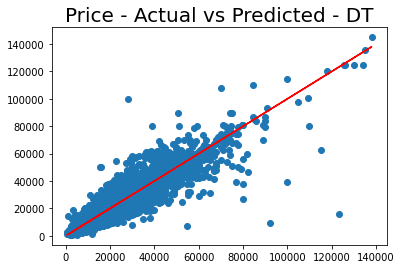

In [21]:
# Show individual distance from actual
plt.scatter(y_test, y_pred_test)
plt.plot(y_test, y_test, c='red')
plt.title('Price - Actual vs Predicted - DT', size=20)
plt.show()

In [22]:
# Show default model info and parameters
default_model_depth = model.get_depth()
default_model_leafs = model.get_n_leaves()
default_model_params = model.get_params(deep=True)
default_model_params_df = pd.DataFrame(default_model_params, index=['default_model']).T

print(
f'''
The maximum depth of the default decision tree model is {default_model_depth} leafs.
The total number of leafs in the default model is {default_model_leafs} leafs.
''')

default_model_params_df


The maximum depth of the default decision tree model is 43 leafs.
The total number of leafs in the default model is 56449 leafs.



,default_model
ccp_alpha,0
criterion,mse
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0


In [23]:
# Messing with feature importance
feature, importance = X_train.columns, model.feature_importances_
fi = pd.DataFrame(data = importance, index = feature, columns = ['importance'])
fi.sort_values(by='importance', ascending=False)

,importance
transmission,0.283927
kpl,0.227703
year,0.178220
engineSize,0.176738
kilometers,0.075432
tax,0.050660
fuelType,0.007319


#### Second run - loop through model limitations

In [24]:
# loops on two different variables:
import itertools

# change the columns
dt_result = pd.DataFrame(columns = ['Depth', 'Leafs', 'Score', 'RMSE_train', 'RMSE_test', 'Validation'])

max_depth_range = range(1, 50, 2)
max_leaf_nodes_range = range(100, 1001, 100)

# Working with the model and loop
for d, l in itertools.product(max_depth_range, max_leaf_nodes_range):
    model = DecisionTreeRegressor(max_depth=d, max_leaf_nodes=l)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    score = model.score(X_test, y_test)

    # RMSE for test population
    rmse_test = mse(y_test, y_pred_test) ** 0.5

    # RMSE for train population
    y_pred_train = model.predict(X_train)
    rmse_train = mse(y_train, y_pred_train) ** 0.5

    # Validation (low score is better)
    Validation = round(abs(rmse_train / rmse_test) -1, 3)
    #dt_result.loc[[[d, l]], 'Score'] = score
    # Add model results to DF

    dt_result = dt_result.append({'Depth': d, 'Leafs': l, 'Score': score, 'RMSE_test': rmse_test, 'RMSE_train': rmse_train, 'Validation': abs(rmse_train / rmse_test) - 1}, ignore_index=True)
dt_result

,Depth,Leafs,Score,RMSE_train,RMSE_test,Validation
0,1.0,100.0,0.280488,8618.792490,8495.839104,0.014472
1,1.0,200.0,0.280488,8618.792490,8495.839104,0.014472
2,1.0,300.0,0.280488,8618.792490,8495.839104,0.014472
3,1.0,400.0,0.280488,8618.792490,8495.839104,0.014472
4,1.0,500.0,0.280488,8618.792490,8495.839104,0.014472
...,...,...,...,...,...,...
245,49.0,600.0,0.895267,2727.819532,3241.376901,-0.158438
246,49.0,700.0,0.895987,2660.111667,3230.212259,-0.176490
247,49.0,800.0,0.895400,2607.614165,3239.320431,-0.195012
248,49.0,900.0,0.895437,2560.038055,3238.741030,-0.209558


In [25]:
# Export the entire loop of trees to CSV
dt_result.to_csv('100_decision_trees.csv')

In [26]:
# Select the min validation
df_treshold = dt_result.loc[dt_result.Score >= 0.88]
df_treshold.loc[df_treshold.Validation.abs() == df_treshold.Validation.abs().min()]

,Depth,Leafs,Score,RMSE_train,RMSE_test,Validation
52,11.0,300.0,0.884008,3111.255976,3411.160771,-0.087919


In [27]:
# Best Decision Tree
params = df_treshold.loc[df_treshold.Validation.abs() == df_treshold.Validation.abs().min()].reset_index().loc[0]
params

index           52.000000
Depth           11.000000
Leafs          300.000000
Score            0.884008
RMSE_train    3111.255976
RMSE_test     3411.160771
Validation      -0.087919
Name: 0, dtype: float64

In [28]:
result = result.append({'Model': f'Decision Tree ({int(params.Depth)}, {int(params.Leafs)})', 'Score': params.Score, \
                        'RMSE_test': params.RMSE_test, 'RMSE_train': params.RMSE_train, 'Validation': params.Validation}, ignore_index=True)

result

,Model,Score,RMSE_train,RMSE_test,Validation
0,Linear Regression - First Run,0.773450,4806.726858,4767.268851,0.008000
1,Linear Regression - Price Target Encoding,0.883151,3102.334196,3423.730013,-0.094000
2,Decision Tree - No Limits,0.862947,530.303037,3707.934561,-0.856982
3,"Decision Tree (11, 300)",0.884008,3111.255976,3411.160771,-0.087919


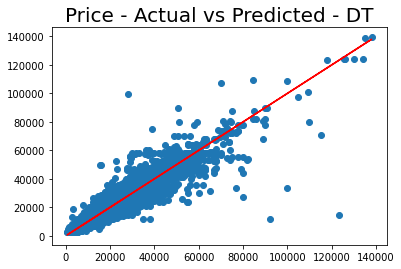

In [29]:
# Show individual distance from actual
plt.scatter(y_test, y_pred_test)
plt.plot(y_test, y_test, c='red')
plt.title('Price - Actual vs Predicted - DT', size=20)
plt.show()

#### Drawing the selected tree

In [30]:
# Showing the best Decision Tree we have got
model = DecisionTreeRegressor(max_depth=int(params.Depth), max_leaf_nodes=int(params.Leafs))
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=None, max_leaf_nodes=300,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [31]:
# Drawing the decision tree using text representation
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_6 <= 16.80
|   |   |--- feature_4 <= 2.75
|   |   |   |--- feature_0 <= 2018.50
|   |   |   |   |--- feature_0 <= 2011.50
|   |   |   |   |   |--- feature_0 <= 2010.50
|   |   |   |   |   |   |--- value: [4793.58]
|   |   |   |   |   |--- feature_0 >  2010.50
|   |   |   |   |   |   |--- value: [12514.12]
|   |   |   |   |--- feature_0 >  2011.50
|   |   |   |   |   |--- feature_4 <= 1.90
|   |   |   |   |   |   |--- feature_0 <= 2017.50
|   |   |   |   |   |   |   |--- value: [14711.04]
|   |   |   |   |   |   |--- feature_0 >  2017.50
|   |   |   |   |   |   |   |--- value: [18673.70]
|   |   |   |   |   |--- feature_4 >  1.90
|   |   |   |   |   |   |--- feature_5 <= 51845.60
|   |   |   |   |   |   |   |--- feature_4 <= 2.10
|   |   |   |   |   |   |   |   |--- feature_3 <= 155.00
|   |   |   |   |   |   |   |   |   |--- value: [24547.37]
|   |   |   |   |   |   |   |   |--- feature_3 >  155.00
|   |   |   |   |   |   |   |   |   |--- value: 

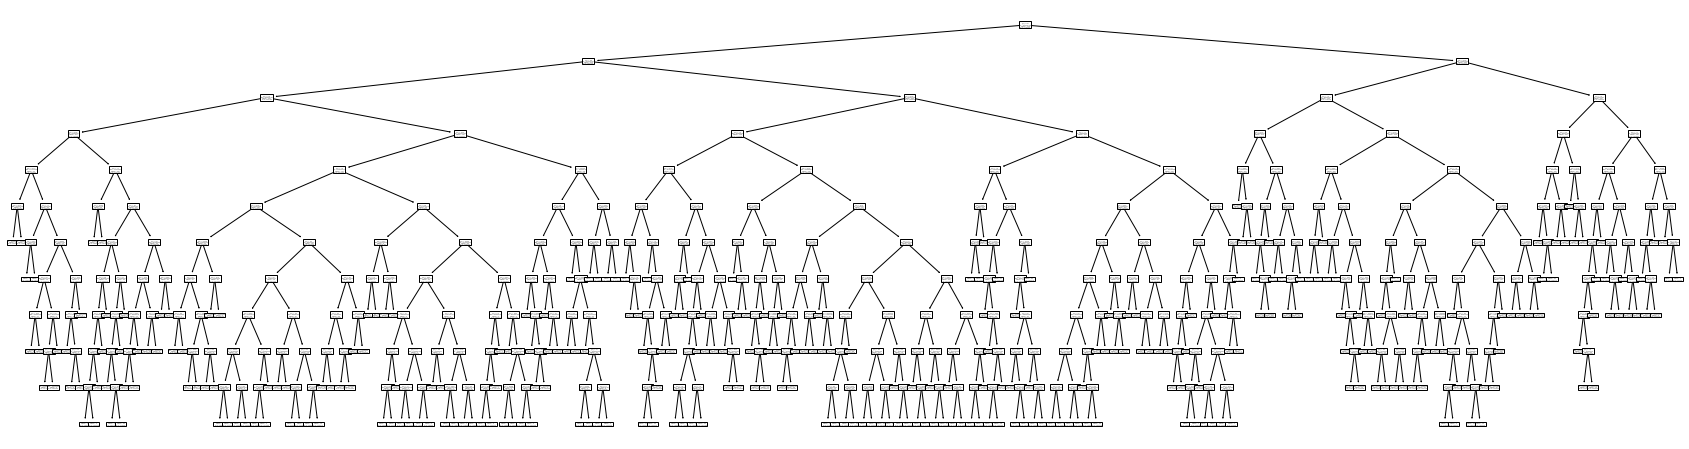

In [32]:
# Drawing the decision tree using plot_tree
# plt.figure(figsize=(400, 200), dpi=120)
plt.figure(figsize=(30, 8))
plot_tree(model);

## K-Nearest Neighbours

In [33]:
# First Run - KNN default = 5 neighbors

# Split the data
X = cars_df.drop(columns=['price', 'model'])
y = cars_df.price

seed = 12345
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Working with the model and loop

model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
score = model.score(X_test, y_test)

# RMSE for test population
rmse_test = mse(y_test, y_pred_test) ** 0.5

# RMSE for train population
y_pred_train = model.predict(X_train)
rmse_train = mse(y_train, y_pred_train) ** 0.5

# Validation (low score is better)
Validation = round(abs(rmse_train / rmse_test) -1, 3)

# Add model results to DF
result = result.append({'Model': 'K-Nearest Neighbours - 5 Neighbors', 'Score': score, 'RMSE_test': rmse_test, 'RMSE_train': rmse_train, 'Validation': abs(rmse_train / rmse_test) - 1}, ignore_index=True)
result

,Model,Score,RMSE_train,RMSE_test,Validation
0,Linear Regression - First Run,0.773450,4806.726858,4767.268851,0.008000
1,Linear Regression - Price Target Encoding,0.883151,3102.334196,3423.730013,-0.094000
2,Decision Tree - No Limits,0.862947,530.303037,3707.934561,-0.856982
3,"Decision Tree (11, 300)",0.884008,3111.255976,3411.160771,-0.087919
4,K-Nearest Neighbours - 5 Neighbors,0.450538,6077.924915,7424.309308,-0.181348


In [34]:
# knn change of the kneighbors param
knn_result = pd.DataFrame(columns = ['Kneighbors', 'Score', 'RMSE_train', 'RMSE_test', 'Validation'])

# Working with the model and loop
for i in range(2, 11):
  model = KNeighborsRegressor(i)
  model.fit(X_train, y_train)
  y_pred_test = model.predict(X_test)
  score = model.score(X_test, y_test)

  # RMSE for test population
  rmse_test = mse(y_test, y_pred_test) ** 0.5

  # RMSE for train population
  y_pred_train = model.predict(X_train)
  rmse_train = mse(y_train, y_pred_train) ** 0.5

  # Validation (low score is better)
  Validation = round(abs(rmse_train / rmse_test) -1, 3)

  # Add model results to DF
  knn_result = knn_result.append({'Kneighbors': i , 'Score': score, 'RMSE_test': rmse_test, 'RMSE_train': rmse_train, 'Validation': abs(rmse_train / rmse_test) - 1}, ignore_index=True)
knn_result

,Kneighbors,Score,RMSE_train,RMSE_test,Validation
0,2.0,0.392812,4429.020840,7804.570094,-0.432509
1,3.0,0.430166,5308.813142,7560.691566,-0.297840
2,4.0,0.445714,5773.167944,7456.829795,-0.225788
3,5.0,0.450538,6077.924915,7424.309308,-0.181348
4,6.0,0.451540,6301.861899,7417.536589,-0.150410
5,7.0,0.450223,6468.693585,7426.441447,-0.128965
6,8.0,0.448267,6599.275313,7439.634919,-0.112957
7,9.0,0.445032,6720.565866,7461.419564,-0.099291
8,10.0,0.441948,6825.905346,7482.120070,-0.087704


In [35]:
# Select the min validation

k_data = knn_result.loc[knn_result.Kneighbors == 6.0].reset_index().loc[0]
k_data

index            4.000000
Kneighbors       6.000000
Score            0.451540
RMSE_train    6301.861899
RMSE_test     7417.536589
Validation      -0.150410
Name: 0, dtype: float64

In [36]:
result = result.append({'Model': f'K-Nearest Neighbours - k={int(k_data.Kneighbors)}', 'Score': k_data.Score,
                      'RMSE_test': k_data.RMSE_test, 'RMSE_train': k_data.RMSE_train, 'Validation': k_data.Validation}, ignore_index=True)

result

,Model,Score,RMSE_train,RMSE_test,Validation
0,Linear Regression - First Run,0.773450,4806.726858,4767.268851,0.008000
1,Linear Regression - Price Target Encoding,0.883151,3102.334196,3423.730013,-0.094000
2,Decision Tree - No Limits,0.862947,530.303037,3707.934561,-0.856982
3,"Decision Tree (11, 300)",0.884008,3111.255976,3411.160771,-0.087919
4,K-Nearest Neighbours - 5 Neighbors,0.450538,6077.924915,7424.309308,-0.181348
5,K-Nearest Neighbours - k=6,0.451540,6301.861899,7417.536589,-0.150410


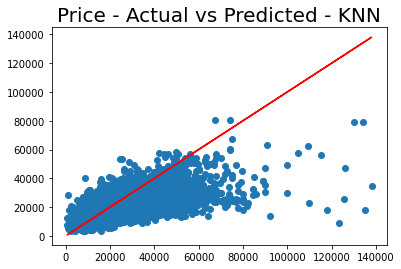

In [37]:
# Show individual distance from actual
plt.scatter(y_test, y_pred_test)
plt.plot(y_test, y_test, c='red')
plt.title('Price - Actual vs Predicted - KNN', size=20)
plt.show()

Conclusion - Looks like the KNN model is not very accurate or useful

## Random Forest

In [38]:
# Split the data
X = cars_df.drop(columns=['price', 'model'])
y = cars_df.price

seed = 12345
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Working with the model
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
score = model.score(X_test, y_test)

# RMSE for test population
rmse_test = mse(y_test, y_pred_test) ** 0.5

# RMSE for train population
y_pred_train = model.predict(X_train)
rmse_train = mse(y_train, y_pred_train) ** 0.5

# Validation (low score is better)
Validation = round(abs(rmse_train / rmse_test) -1, 3)

# Add model results to DF
result = result.append({'Model': 'Random Forest', 'Score': score, 'RMSE_test': rmse_test, 'RMSE_train': rmse_train, 'Validation': Validation}, ignore_index=True)

result

,Model,Score,RMSE_train,RMSE_test,Validation
0,Linear Regression - First Run,0.773450,4806.726858,4767.268851,0.008000
1,Linear Regression - Price Target Encoding,0.883151,3102.334196,3423.730013,-0.094000
2,Decision Tree - No Limits,0.862947,530.303037,3707.934561,-0.856982
3,"Decision Tree (11, 300)",0.884008,3111.255976,3411.160771,-0.087919
4,K-Nearest Neighbours - 5 Neighbors,0.450538,6077.924915,7424.309308,-0.181348
5,K-Nearest Neighbours - k=6,0.451540,6301.861899,7417.536589,-0.150410
6,Random Forest,0.909465,1211.678212,3013.663527,-0.598000


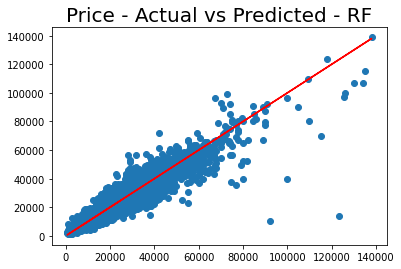

In [39]:
# Show individual distance from actual
plt.scatter(y_test, y_pred_test)
plt.plot(y_test, y_test, c='red')
plt.title('Price - Actual vs Predicted - RF', size=20)
plt.show()